# **T2.1 Model training & evaluation**

# **Task 1: Classification model performance analysis on the iris dataset**

In this task, we are going to consider the well-know iris dataset. Additionally, we are going to implement a simple k-NN algorithm and use common scores to validate the performance.


https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

The following lines load the data:

In [16]:
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data
y = iris.target


**1)** Generate  a k-NN model considering just one neighbor (k=1)

 https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Compute the accuracy score of the proposed model using the training dataset. Can we conclude that the model is good? Why?

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(x, y)

y_fit = neigh.predict(x)
fit_score = accuracy_score(y, y_fit)
print(f"Fit score: {fit_score}")

# We cannot conclude that the model is good because we are computing the score with the same data used for "training"

Fit score: 1.0


**2)** Split the data in training & validation subsets. Select 70% of the data as training data, the rest as validation. You may consider the following function

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Train again the model with the training subset.  Compute the accuracy score of the new  model using the validation subset. Is this score different from the previous one? Why?

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=46)

neigh.fit(x_train, y_train)
y_fit = neigh.predict(x_test)

fit_score = accuracy_score(y_test, y_fit)
print(f"Fit score: {fit_score}")

Fit score: 0.9111111111111111


**3)** Compute the multi-class confusion matrix of the model using the validation data. Additionally, compute the precision and recall for each class. You may consider the following:

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter




Recall: [1.         0.92307692 0.8       ]
Precision: [1.         0.8        0.92307692]


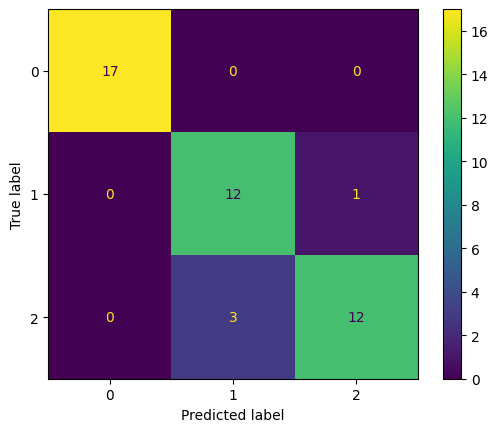

In [ ]:
from sklearn.metrics import recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

C = confusion_matrix(y_test, y_fit)
disp = ConfusionMatrixDisplay(C)
disp.plot()

# Compute Recall & Precision
recall = recall_score(y_test, y_fit, average=None)
precision = precision_score(y_test, y_fit, average=None)
print(f"Recall: {recall}\nPrecision: {precision}")

**4)** Implement a 20-fold cross-validation algorithm on the model. Validate (simultaneously) the precision and the recall of the model. You may consider the following:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

For the k-fold cross-validation do you need to use only the training data, only the validation data or the full dataset?

In [29]:
# For k-fold cross validation, only the training data is used (https://scikit-learn.org/stable/modules/cross_validation.html)

from sklearn.model_selection import cross_validate

scoring = ["precision_macro", "recall_macro"] # define scroing strategies

# Cross validate (this function separates the dataset into test/train data and performs k-fold cross-validation)
scores = cross_validate(neigh, x, y, cv=20, scoring=scoring)
print(scores)

prec_mean = scores["test_precision_macro"].mean()
rec_mean  = scores["test_recall_macro"].mean()

print(f"\n Precision Macro mean: {prec_mean}")
print(f"\n Recall Macro mean: {rec_mean}")

{'fit_time': array([0.00072694, 0.00055933, 0.0005312 , 0.00056553, 0.00054526,
       0.00046563, 0.0004282 , 0.00066257, 0.00047731, 0.00076413,
       0.00068498, 0.00042057, 0.0004251 , 0.00046158, 0.00043797,
       0.00056267, 0.00053811, 0.00043154, 0.00085282, 0.00064874]), 'score_time': array([0.00366163, 0.00310445, 0.00295663, 0.00413489, 0.00273013,
       0.00273538, 0.00291753, 0.00370908, 0.00307178, 0.00309873,
       0.0026958 , 0.00246239, 0.00258279, 0.00256371, 0.00232887,
       0.00350118, 0.00305438, 0.00261545, 0.00321865, 0.00325537]), 'test_precision_macro': array([1.        , 1.        , 0.88888889, 1.        , 1.        ,
       1.        , 0.88888889, 1.        , 1.        , 1.        ,
       0.83333333, 0.91666667, 1.        , 1.        , 0.88888889,
       1.        , 1.        , 1.        , 1.        , 1.        ]), 'test_recall_macro': array([1.        , 1.        , 0.88888889, 1.        , 1.        ,
       1.        , 0.88888889, 1.        , 1.      

# **Task 2: (Open Problem) Classification model performance analysis on two additional data sets**

For this task, you must use all your available tools to fit, evaluate, and refine a k-NN classification model for each of the following datasets (one model per dataset).

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

During this task you may consider the following points:

1) Try to visualize the data. Is your problem a binary classification or a multi-class classification problem? Is the dataset/problem balanced and symmetric?

2) Select a good performance indicator in order to evaluate the model (accuracy, recall, precision, etc.).

3) Select a good strategy to validate the model. You may consider hold-out data, a k-fold cross validation approach or a combination of both.

4) Modify the hyperparameters of the model in order to improve the performance.


# Breast Cancer Dataset

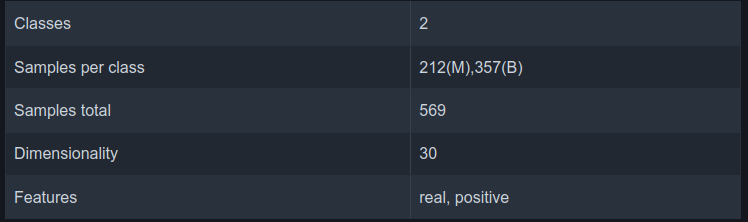

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns

# Breast cancer dataset
breast = load_breast_cancer()
x = breast.data
y = breast.target
breast 

df = pd.DataFrame(x, columns=breast.feature_names)
df["class"] = y

# sns.pairplot(df,hue='class') # too much overhead

# Check balance


# NOTES:
#   - binary classification problem
#   - balanced ???
#   - symmetric ??? 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class,count
0,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.00000,0.1930,0.07818,...,50.41,185.2,0.1584,0.12020,0.00000,0.00000,0.2932,0.09382,1,1
1,14.860,16.94,94.89,673.7,0.08924,0.07074,0.03346,0.02877,0.1573,0.05703,...,102.30,777.5,0.1218,0.15500,0.12200,0.07971,0.2525,0.06827,1,1
2,14.710,21.59,95.55,656.9,0.11370,0.13650,0.12930,0.08123,0.2027,0.06758,...,115.70,985.5,0.1368,0.42900,0.35870,0.18340,0.3698,0.10940,0,1
3,14.740,25.42,94.70,668.6,0.08275,0.07214,0.04105,0.03027,0.1840,0.05680,...,107.40,826.4,0.1060,0.13760,0.16110,0.10950,0.2722,0.06956,1,1
4,14.760,14.74,94.87,668.7,0.08875,0.07780,0.04608,0.03528,0.1521,0.05912,...,114.20,880.8,0.1220,0.20090,0.21510,0.12510,0.3109,0.08187,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,12.200,15.21,78.01,457.9,0.08673,0.06545,0.01994,0.01692,0.1638,0.06129,...,91.11,583.1,0.1256,0.19280,0.11670,0.05556,0.2661,0.07961,1,1
565,12.190,13.29,79.08,455.8,0.10660,0.09509,0.02855,0.02882,0.1880,0.06471,...,91.38,545.2,0.1427,0.25850,0.09915,0.08187,0.3469,0.09241,1,1
566,12.180,20.52,77.22,458.7,0.08013,0.04038,0.02383,0.01770,0.1739,0.05677,...,84.58,547.8,0.1123,0.08862,0.11450,0.07431,0.2694,0.06878,1,1
567,12.180,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.02941,0.1900,0.06635,...,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376,1,1


# Wine Dataset

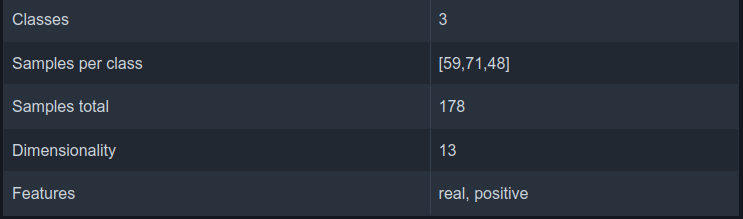

In [ ]:
from sklearn.datasets import load_wine

# Breast cancer dataset
wine = load_wine()
x = wine.data
y = wine.target